#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### In this scenario, we're going to find out an appropriate model for GDP of China that had been observed through out the years from 1960 to 2014.
#### The dataset is rather a simple one as it includes two columns named Year and Value.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### First, let's import the required libraries

In [1]:
import pandas as pd # To be able to handle data with ease (by employing dataframe structure)
import matplotlib.pyplot as plt # To visualize the data & models
import numpy as np # To be able to treat the data as vectors

### Importing the data from the Internet

#### In this example, we try and fit a nonlinear model to the data points corresponding to China's GDP from 1960 to 2014.

In [3]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-05-02 12:03:28 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [4]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the dataset in advance to decide on a model

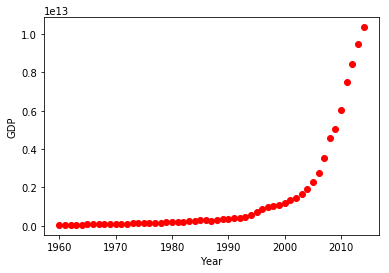

In [9]:
plt.plot(df["Year"].values,df["Value"].values, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Forming the model

In [ ]:
# From an initial look on the dataset plot, we see that
# the Logistic function can be a good choice to model

def sigmoid(x, theta1, theta2):
     y = 1 / (1 + np.exp(-theta1*(x-theta2)))
     return y

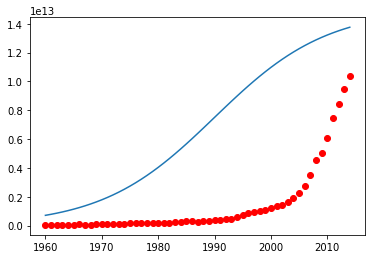

In [10]:
# Initial guess for the coefficients
theta1 = 0.10
theta2 = 1990.0

yPred = sigmoid(x_data, theta1 , theta2)

# Plotting the initial prediction

plt.plot(df["Year"].values, yPred*15000000000000.)
plt.plot(df["Year"].values, df["Value"].values, 'ro')

In [19]:
# It is apperent that our initial guess is not quite right
# To find the best parameters for our fit line, we employ
# "curve_fit" function which uses non-linear least squares to fit our sigmoid function, to the data.

# Lets first normalize our data
xData =x_data/max(df["Year"].values)
yData =y_data/max(df["Value"].values)

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
# Printing the final parameters
print(" theta1 = %f, theta2 = %f" % (popt[0], popt[1]))

 theta1 = 690.453017, theta2 = 0.997207


### Plotting our dataset and the Best Fit

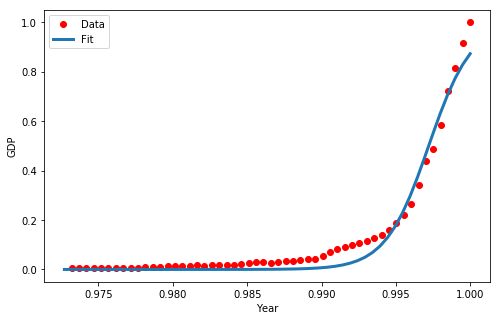

In [18]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='Data')
plt.plot(x,y, linewidth=3.0, label='Fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()